# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

Part of DS coursework

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/moviebudgetvsrevenue/cost_revenue_dirty.csv


# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
m_data = pd.read_csv('/kaggle/input/moviebudgetvsrevenue/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

#### As part of DS coursework

In [5]:
m_data.shape

(5391, 6)

In [6]:
m_data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [7]:
m_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [8]:
m_data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [9]:
m_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1790,1111,3/29/2002,Death to Smoochy,"$50,000,000","$8,374,062","$8,355,815"
4208,820,8/17/2012,ParaNorman,"$60,000,000","$108,119,662","$56,003,051"
1579,5087,2/11/2001,Everything Put Together,"$500,000","$7,890",$0
3007,2846,11/5/2007,28 Weeks Later,"$15,000,000","$64,232,714","$28,638,916"
1017,2847,11/4/1997,Grosse Pointe Blank,"$15,000,000","$31,070,412","$28,084,357"


Any duplicated values?

In [10]:
m_data.duplicated().values.any()

False

#### How many rows of duplicated data?

In [11]:
m_data_duplicated = m_data[m_data.duplicated()]
len(m_data_duplicated)

0

In [12]:
print(f'Any NaN values?: {m_data.isna().values.any()} ')
print(f'Any duplicated rows?: {len(m_data[m_data.duplicated()])}')

Any NaN values?: False 
Any duplicated rows?: 0


In [13]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


#### So no null values either

In [14]:
m_data.isna().values.any()

False

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [15]:
chars_to_remove = ['$', ',']
columns_to_clean = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross' ]
for col in columns_to_clean:
    for char in chars_to_remove:
        m_data[col] = m_data[col].astype(str).str.replace(char, "")
    m_data[col] = pd.to_numeric(m_data[col])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [16]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [17]:
m_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3963,4520,8/26/2011,Redemption Road,2300000,29384,29384
2928,144,6/29/2007,Ratatouille,150000000,626549695,206445654
721,1060,5/25/1994,Beverly Hills Cop III,50000000,119180938,42586861
891,2103,7/26/1996,The Adventures of Pinocchio,25000000,36682170,15382170
1187,531,12/25/1998,Mighty Joe Young,80000000,50632037,50632037


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [18]:
m_data['Release_Date'] = pd.to_datetime(m_data['Release_Date'])

In [19]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [20]:
m_data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


The average movies costs about $31 million and makes about $89 million.
The movies in bottom quartile lose money. They cost about $5 million and make about $4 million in worldwide revenue.

#### The lowest budeget movie in the dataset?

In [21]:
m_data[m_data['USD_Production_Budget']==1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


#### Movie, 'My Date with Drew' was made with a budget of $1100 and made $181,041! A success considering the budget!

In [22]:
m_data[m_data['USD_Production_Budget']==425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [23]:
zero_drevenue = m_data[m_data['USD_Domestic_Gross']==0]
print(f'Number of movies with USD Domestic gross = 0 is: {len(zero_drevenue)}')

Number of movies with USD Domestic gross = 0 is: 512


In [24]:
zero_drevenue.sort_values(('USD_Production_Budget'), ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
zero_wrevenue = m_data[m_data['USD_Worldwide_Gross']==0]
print(f'Number of movies with worldwide revenue = 0: {len(zero_wrevenue)}')

Number of movies with worldwide revenue = 0: 357


In [26]:
zero_wrevenue.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [27]:
m_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Filtering on Multiple Conditions

In [28]:
International_release_loc = m_data.loc[(m_data.USD_Domestic_Gross==0)&(m_data.USD_Worldwide_Gross!=0)]
print(f'Number of only international release: {len(International_release_loc)}')

Number of only international release: 155


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [29]:
International_Release = m_data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of only International Release is: {len(International_Release)}')

Number of only International Release is: 155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [30]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
type(scrape_date)


pandas._libs.tslibs.timestamps.Timestamp

In [31]:
Released_later = m_data[m_data['Release_Date'] >= scrape_date]
print(Released_later)

      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000   

In [32]:
print(f'Number of movies released after data was scraped: {len(Released_later)}')

Number of movies released after data was scraped: 7


#### Removing movies that were release after data was scraped

In [33]:
m_data_clean = m_data.drop(Released_later.index)

In [34]:
m_data_clean.sort_values('Release_Date', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
1,5140,1916-05-09,Intolerance,385907,0,0


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [35]:
loss_movies = m_data.query('USD_Production_Budget > USD_Worldwide_Gross')
print(loss_movies)

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
15    4738   1936-05-02                      Modern Times   
17    4814   1936-10-20  Charge of the Light Brigade, The   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

In [36]:
loss_movies.shape[0]/m_data_clean.shape[0]

0.37407132243684993

#### Percentage of movies that were at loss is 37%

# Seaborn for Data Viz: Bubble Charts

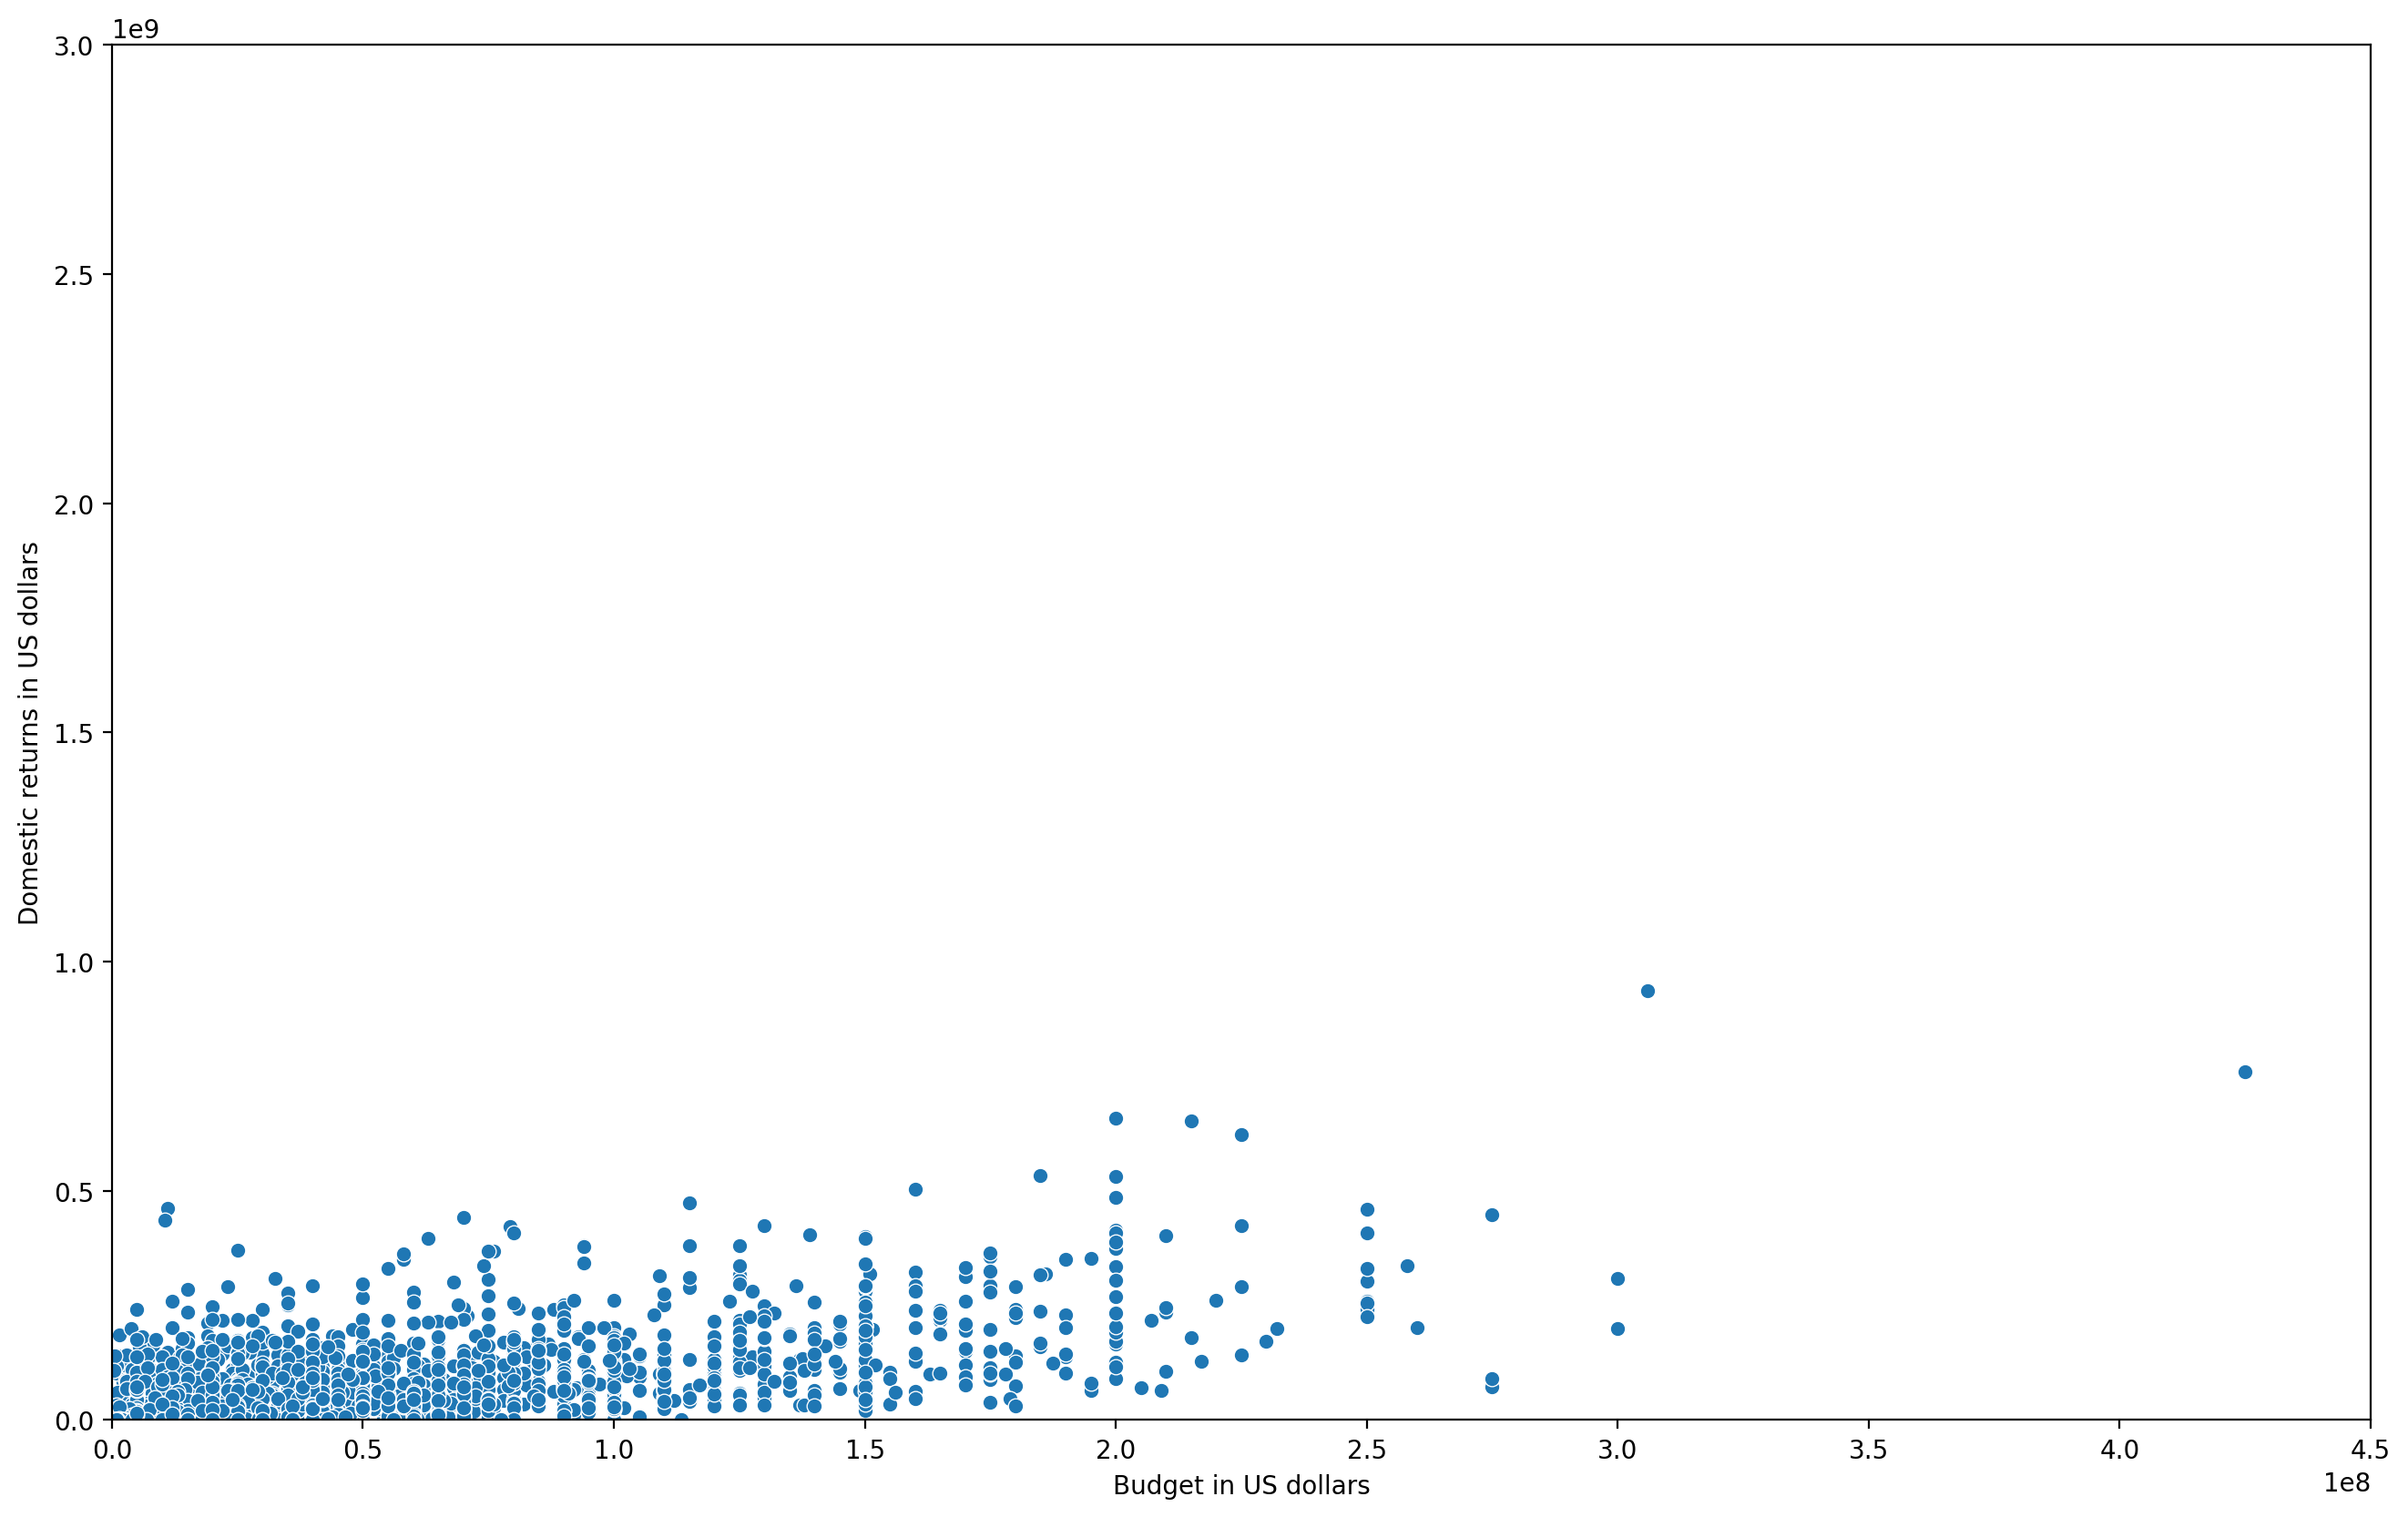

In [37]:

plt.figure(figsize=(16,10), dpi=200)
#set axes object
ax = sns.scatterplot(data=m_data_clean,
               x=m_data_clean.USD_Production_Budget,
               y=m_data_clean.USD_Domestic_Gross)
ax.set(ylim=(0,3000000000),
      xlim=(0,450000000),
           ylabel='Domestic returns in US dollars',
      xlabel='Budget in US dollars')
plt.show()

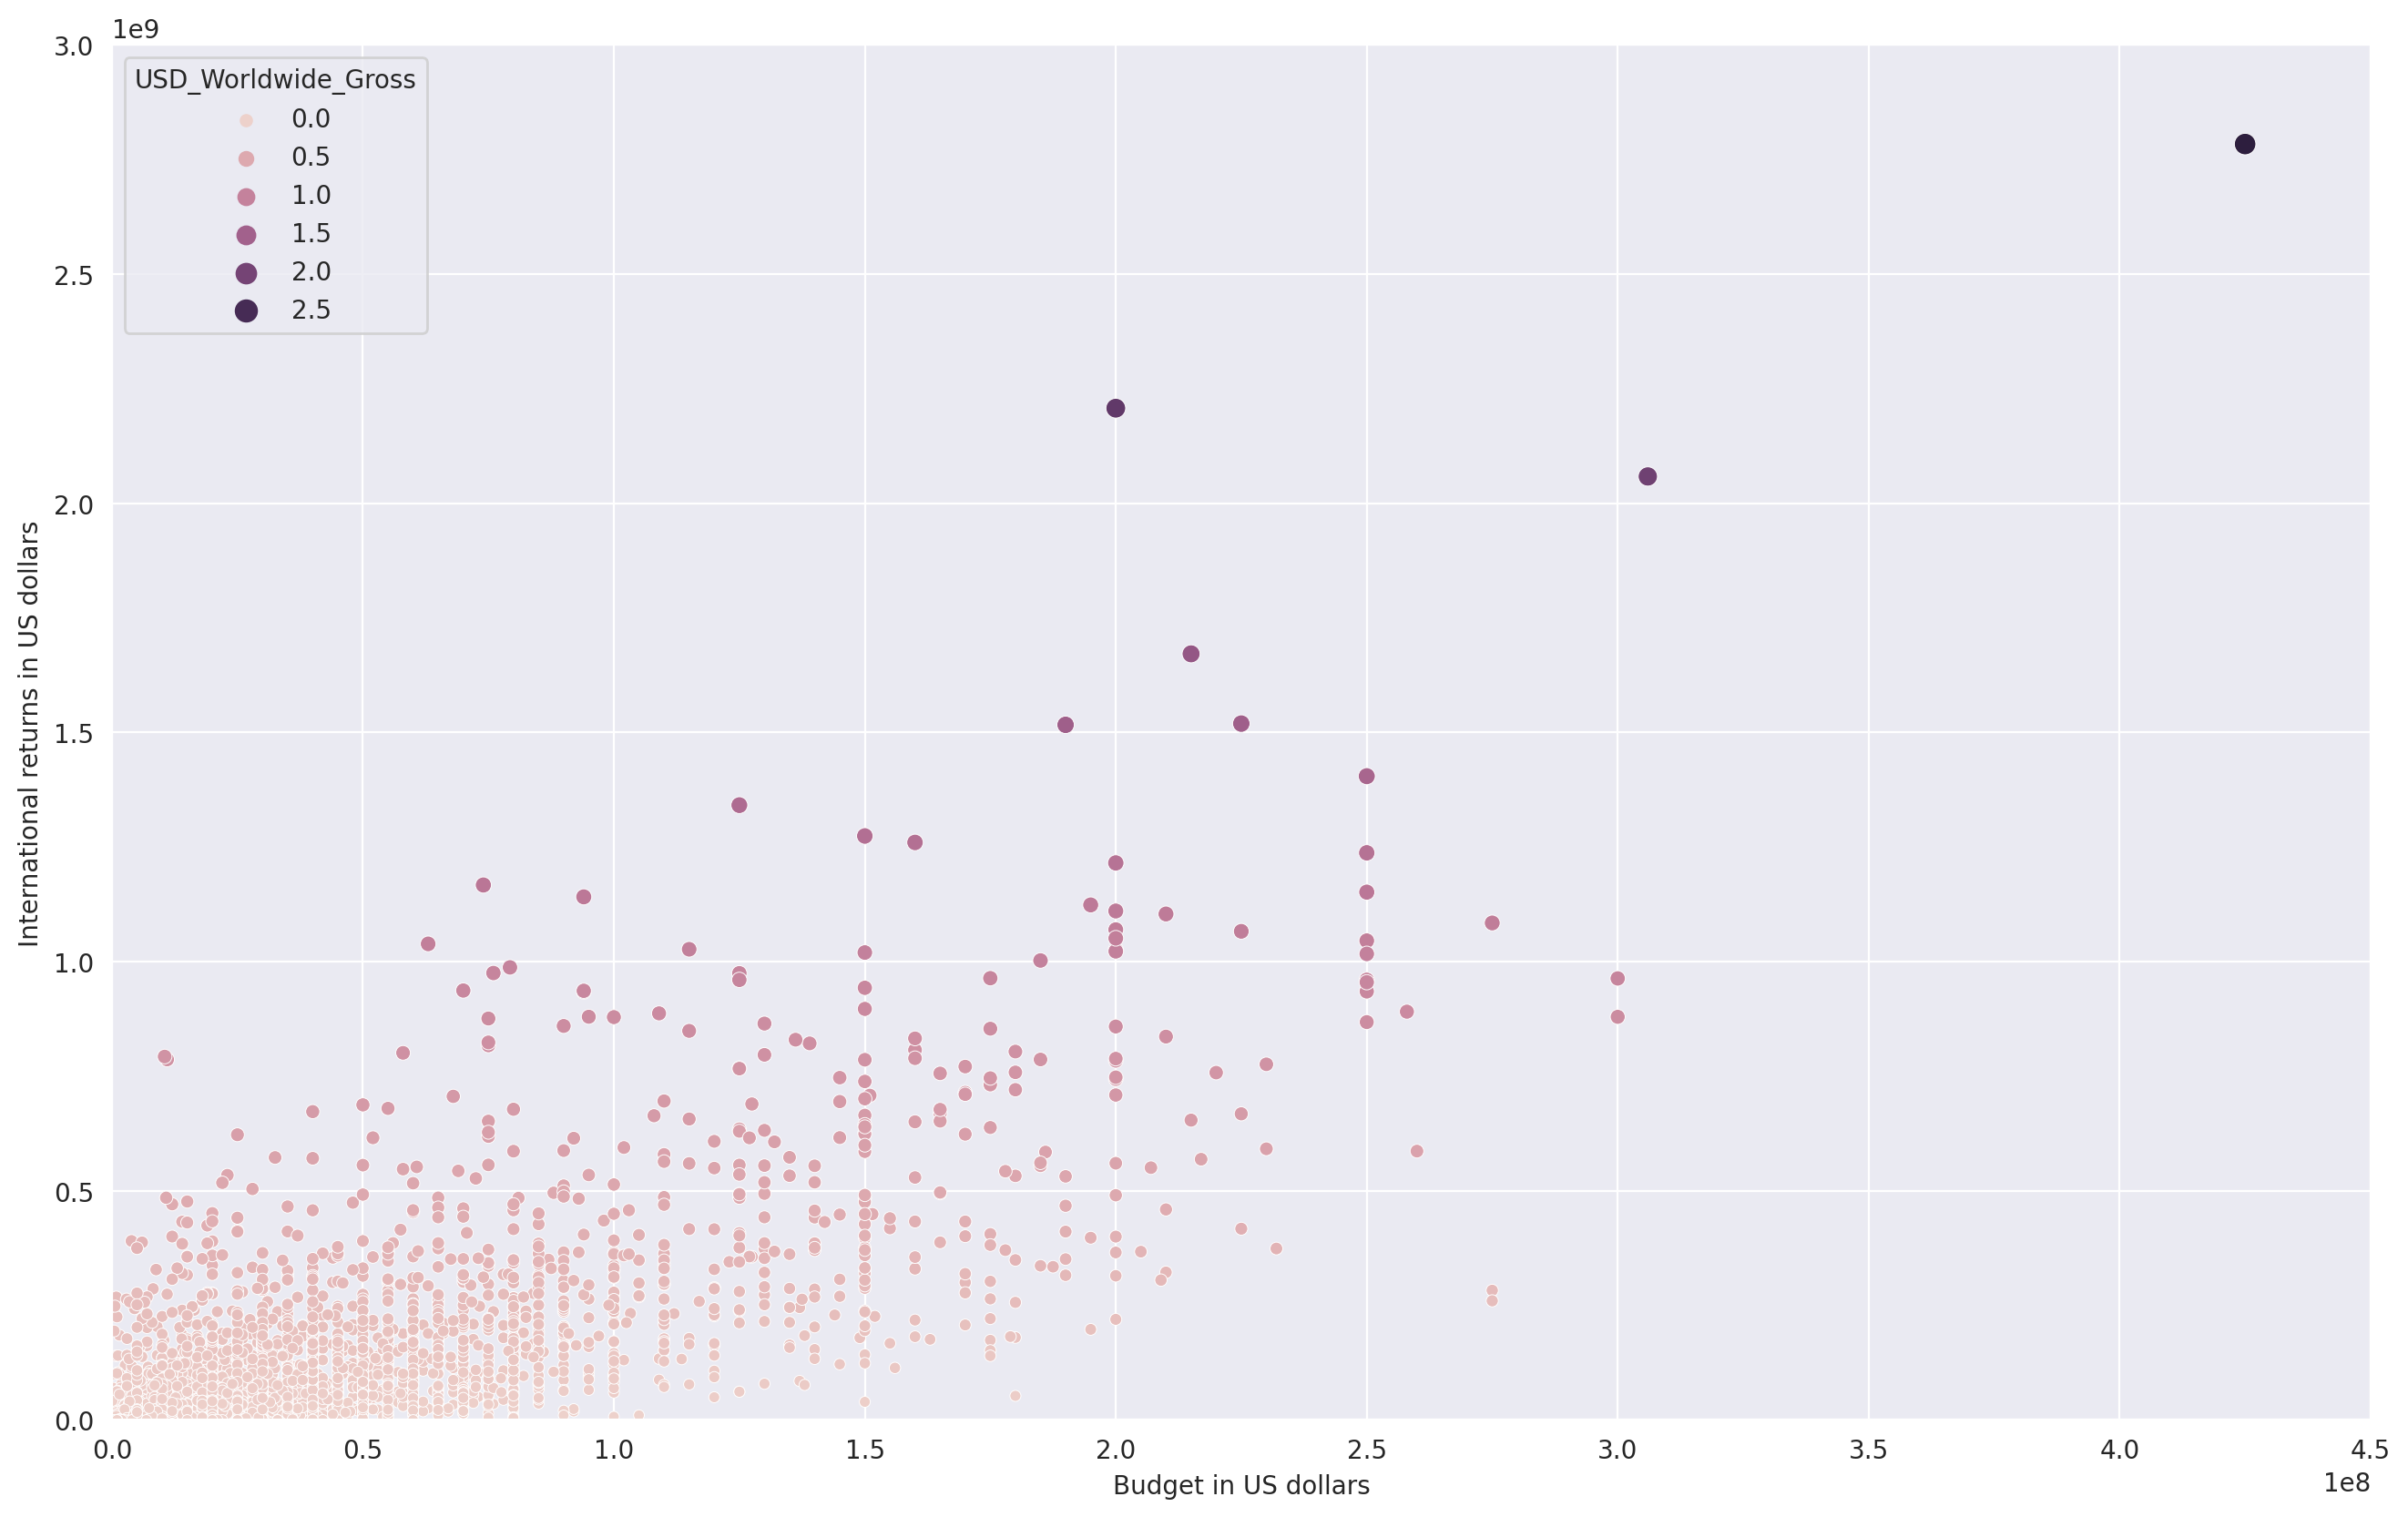

In [38]:
plt.figure(figsize=(16,10), dpi=200)
#set styling on single chart
#set axes object
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=m_data_clean,
                   x=m_data_clean.USD_Production_Budget,
                   y=m_data_clean.USD_Worldwide_Gross,
                        hue=m_data_clean.USD_Worldwide_Gross,
                        size=m_data_clean.USD_Worldwide_Gross)
ax.set(ylim=(0,3000000000),
      xlim=(0,450000000),
           ylabel='International returns in US dollars',
      xlabel='Budget in US dollars')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



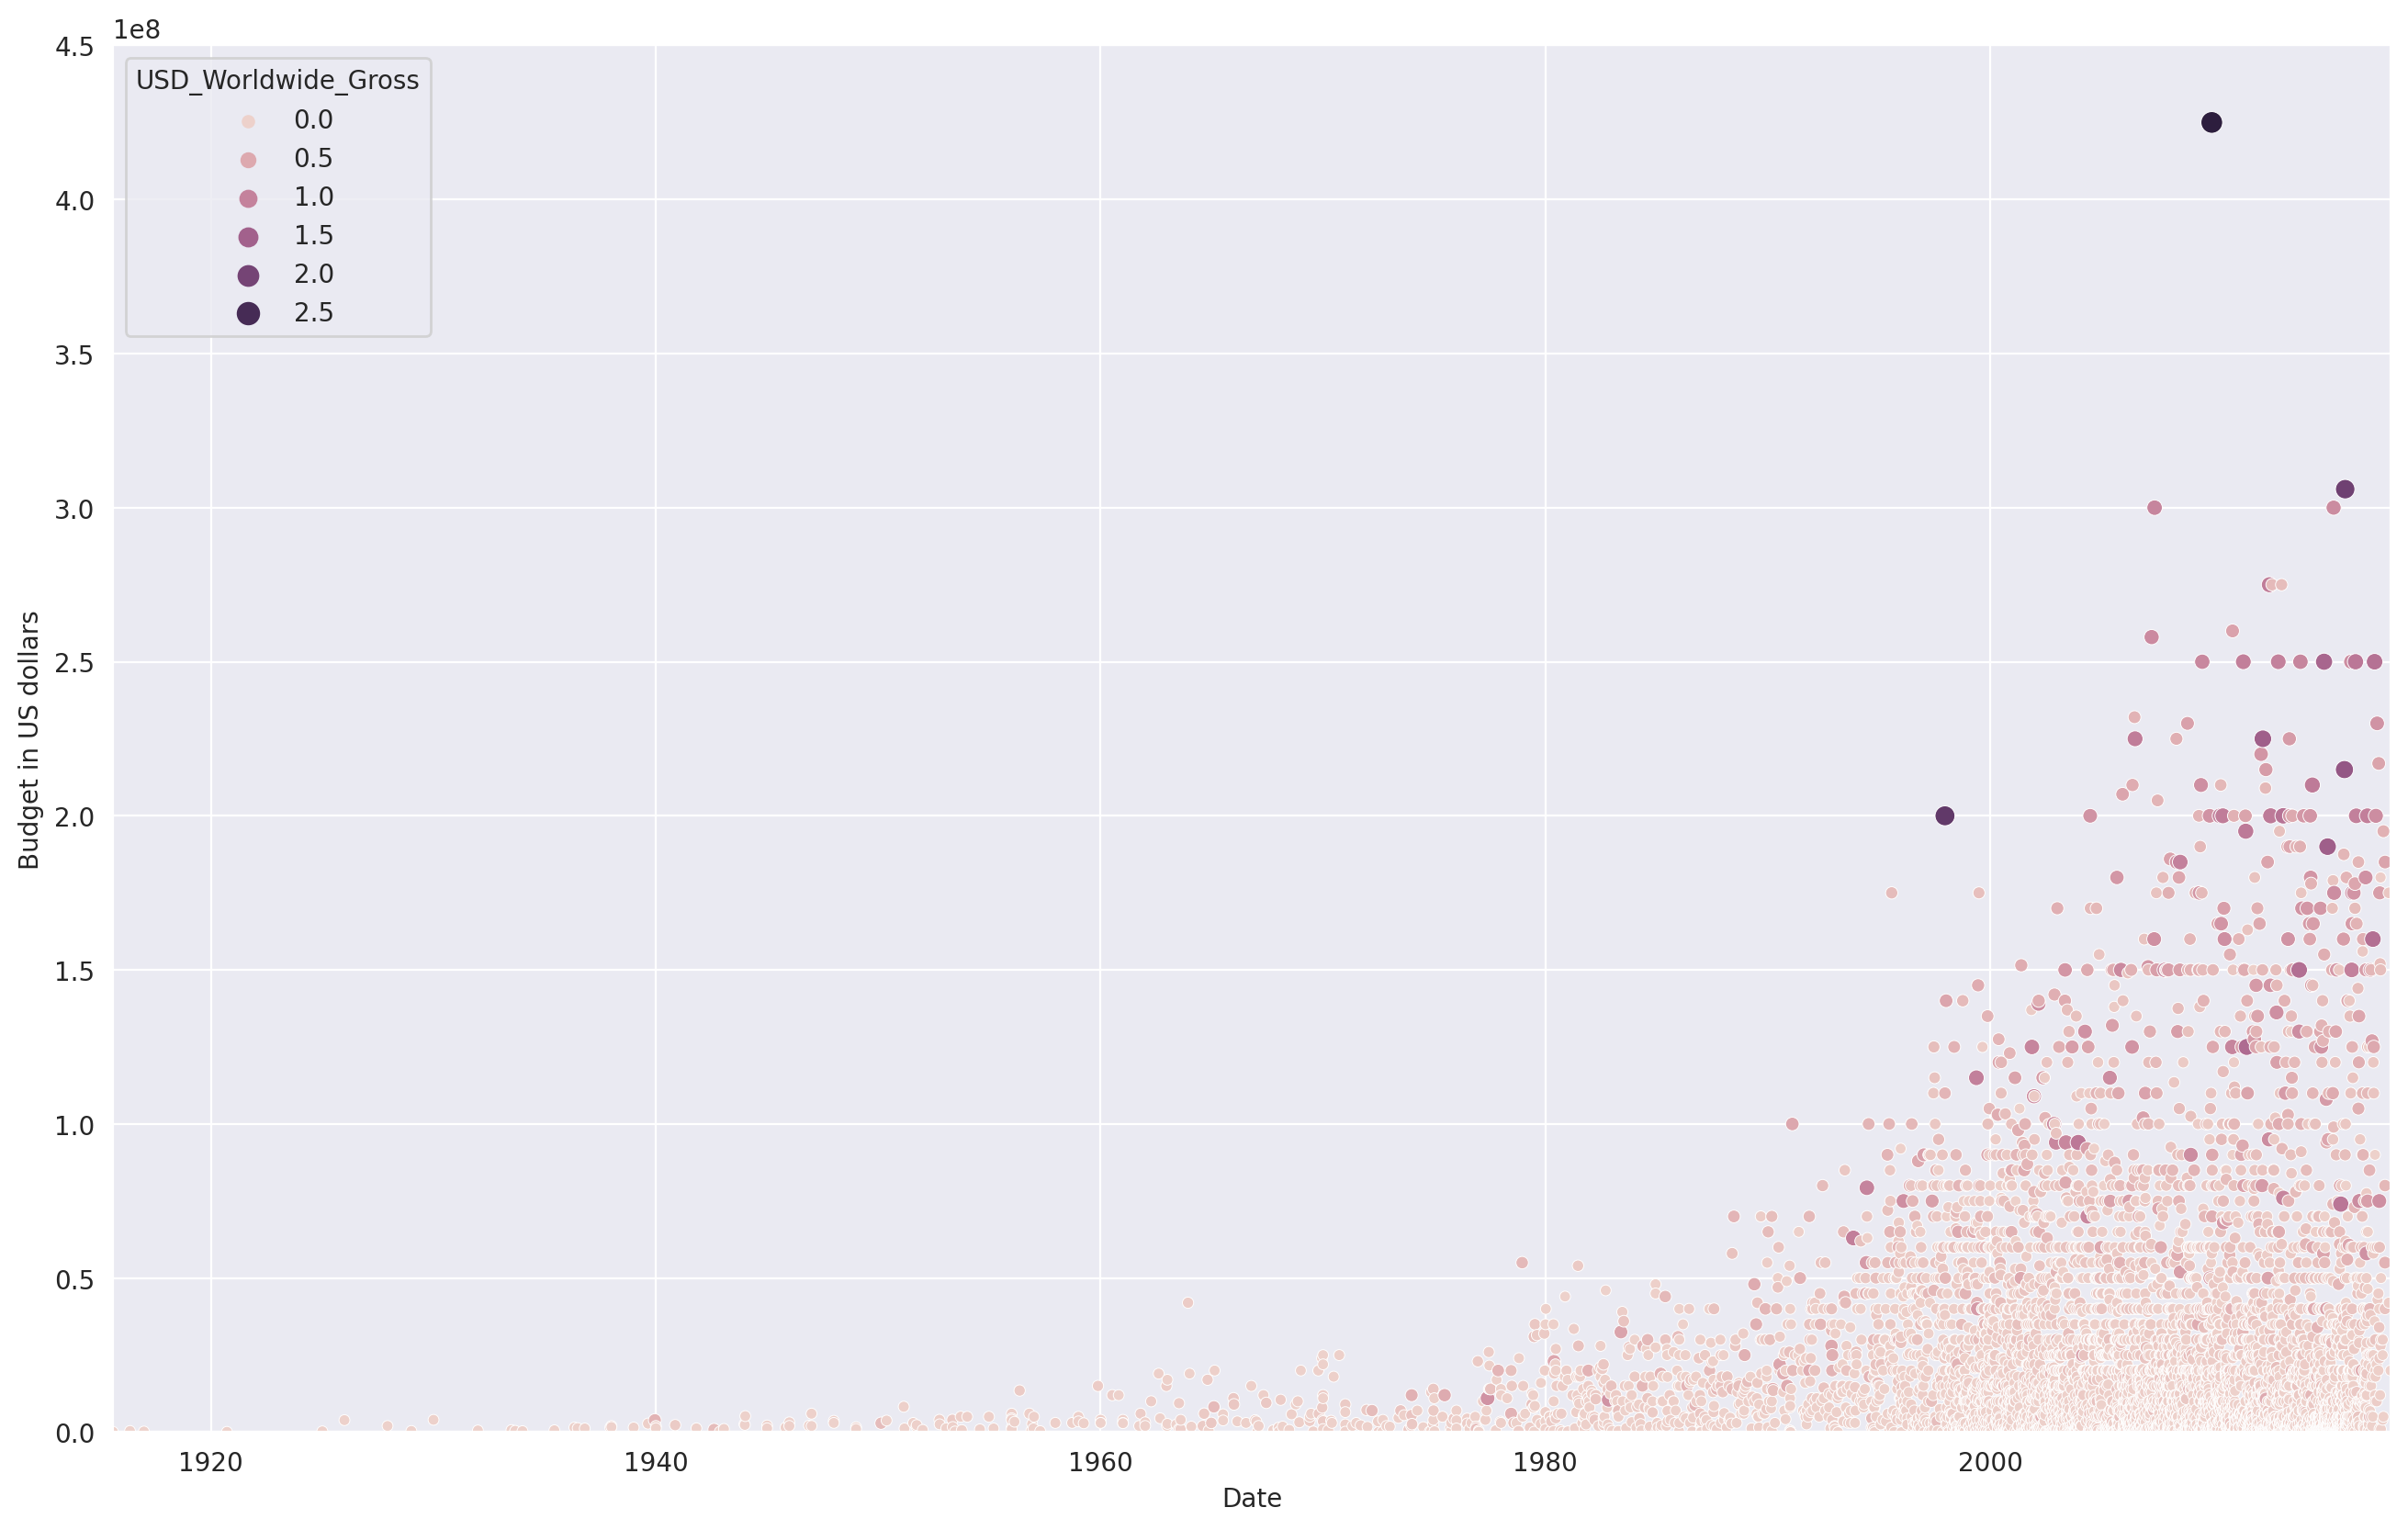

In [39]:
plt.figure(figsize=(16,10), dpi=200)
#set styling on single chart
#set axes object
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=m_data_clean,
                   x=m_data_clean.Release_Date,
                   y=m_data_clean.USD_Production_Budget,
                        hue=m_data_clean.USD_Worldwide_Gross,
                        size=m_data_clean.USD_Worldwide_Gross)
ax.set(xlim=(m_data_clean.Release_Date.min(), m_data_clean.Release_Date.max()),
      ylim=(0,450000000),
           xlabel='Date',
      ylabel='Budget in US dollars')
plt.show()

### The above chart shows that movie production budgets have exploeded from 1980s onwards. The number of movies produced have also grown. This coincides with the fact that many world markets have opened up in the last 40 years, increasing size movie watching audience.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [40]:
dt_index = pd.DatetimeIndex(m_data_clean.Release_Date)
years = dt_index.year

In [41]:
decades = years//10*10

In [42]:
m_data_clean['Decade']=decades

In [43]:
m_data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [44]:
old_films = m_data_clean[m_data_clean['Decade']<= 1960]
new_films = m_data_clean[m_data_clean['Decade']>1960]

In [45]:
old_films.shape

(153, 7)

In [46]:
new_films.shape

(5231, 7)

In [47]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


In [48]:
old_films.sort_values('Release_Date', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

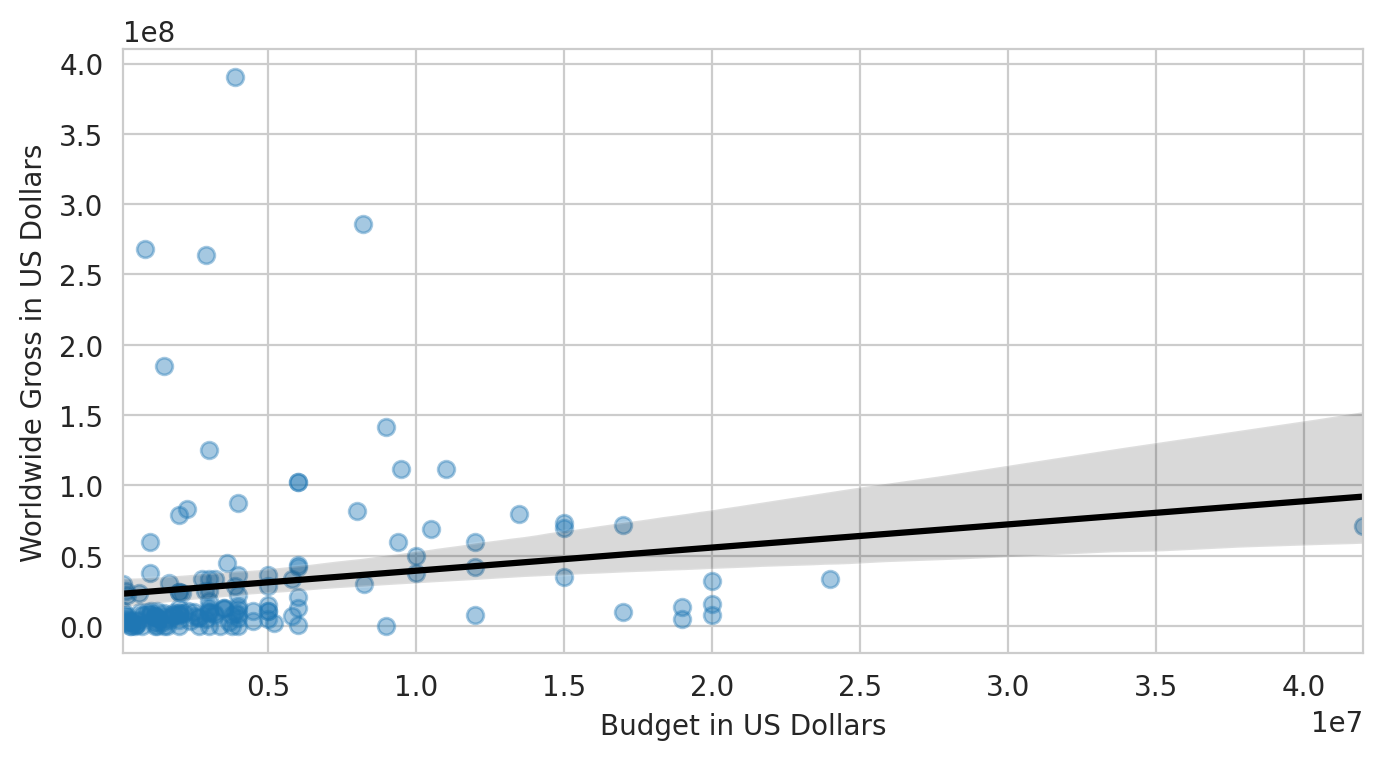

In [49]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    ax = sns.regplot(data=old_films,
                    x=old_films.USD_Production_Budget,
                    y=old_films.USD_Worldwide_Gross,
                    scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
    ax.set(xlabel='Budget in US Dollars',
          ylabel='Worldwide Gross in US Dollars'
          )
    plt.show()

### No relationship seen between Budget and movie revenue. Many low budget movies have made lots of money!

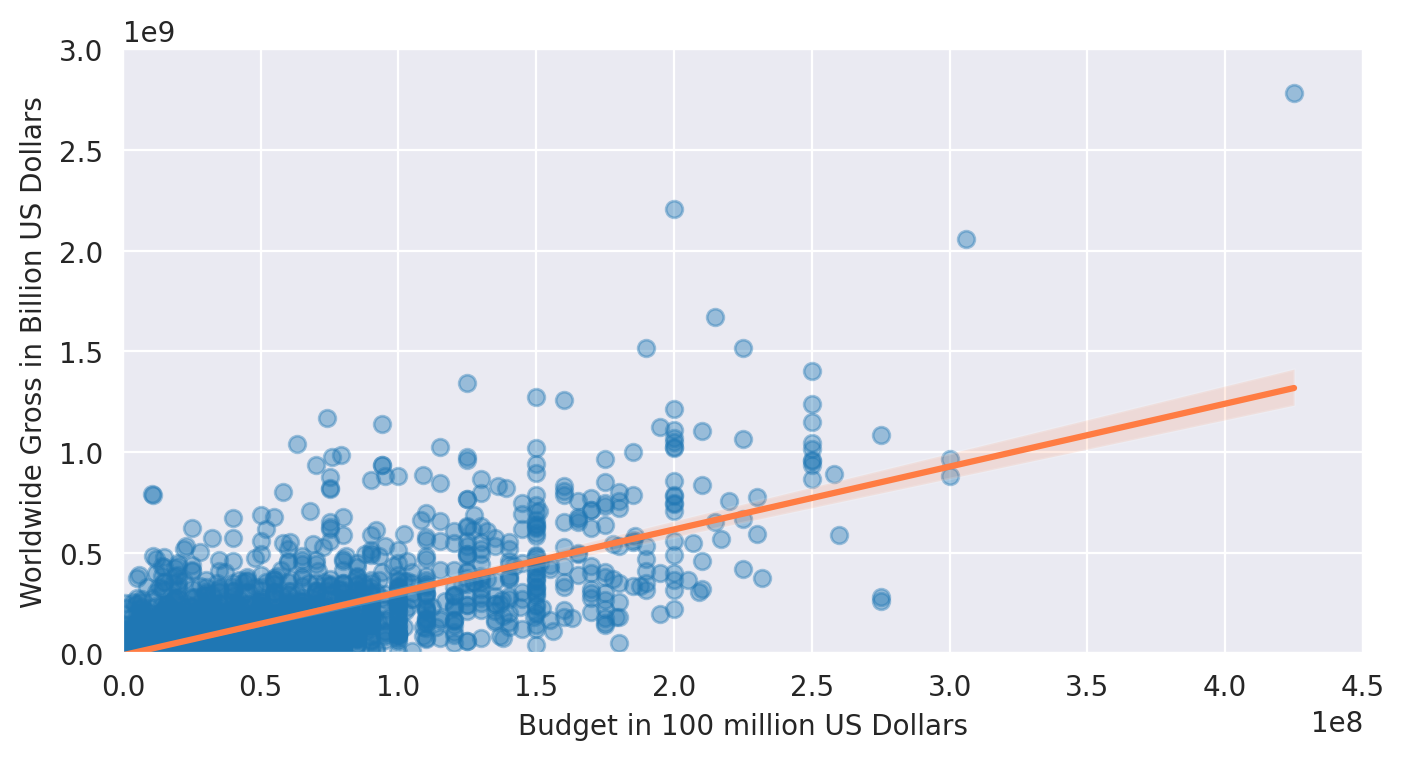

In [50]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                    x=new_films.USD_Production_Budget,
                    y=new_films.USD_Worldwide_Gross,
                    scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
    ax.set(xlabel='Budget in 100 million US Dollars',
          ylabel='Worldwide Gross in Billion US Dollars',
           ylim=(0,3000000000),
           xlim=(0,450000000)
          )
    plt.show()

### Looking at above chart it can be seen that there is relationship between a movie's budget and its worldwide revenue. A movie made with budget of $150 million can be expected to make about $500 million in revenue. Data points line up well with regression line.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [51]:
regression = LinearRegression()

In [52]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [53]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [54]:
#theta zero
regression.intercept_[0]

-8650768.006610274

In [55]:
#theta one
regression.coef_[0]

array([3.12259592])

### Basically means that if budget is 0, than revenuw would be -$8.65! Also, if budget is $1, extra money earned is $3.1!

In [56]:
# R-squared
regression.score(X, y)

0.5577032617720403

R square is .558 means that model explains about 56% of movie variance.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [57]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [58]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [59]:
#theta zero
regression.intercept_[0]

22821538.635080386

In [60]:
#theta one
regression.coef_[0]

array([1.64771314])

In [61]:
# R-squared
regression.score(X, y)

0.02937258620576877

The Slope Coefficient is 1.64
The intercept is 22821538
The r-squared is .029. Means the model can only explain 3% of movie variance. The intercept is 1.64 so there is still positive relation between budget and revenue but r-squared is very low.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [62]:
Revenue = 22821538 + 1.64771314 * 350000000
print(Revenue)

599521137.0


In [63]:
#Alternate calculation
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
